In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4345352570553314311
 xla_global_id: -1]

In [2]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import math
import pylab as plt
import sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import model_selection
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")




%matplotlib inline

Mounted at /content/drive


In [4]:
train_data = pd.read_csv('/content/drive/My Drive/kaggle-titanic/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/kaggle-titanic/test.csv')
p_id = test_data['PassengerId']
data = pd.concat([train_data, test_data])
data.shape

(1309, 12)

In [5]:
print(train_data.isnull().any())
print()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool



In [6]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
train_data['Cabin'].fillna('NotFClass', inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Idade')

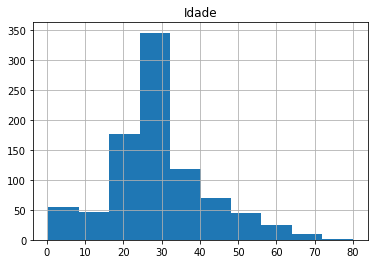

In [8]:
media_idade = train_data['Age'].mean()
train_data['Age'].fillna(media_idade, inplace=True)
train_data['Age'].hist()
plt.title('Idade')

In [9]:
train_data['Embarked'].fillna('S', inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train_data.to_csv('lab2_train_no_nulls.csv', index=False)

In [11]:
train_data = pd.read_csv('lab2_train_no_nulls.csv')

In [12]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
print(train_data.sort_values('Age', ascending=False).head(5)['Age'])
print(train_data.sort_values('Age', ascending=True).head(5)['Age'])

630    80.0
851    74.0
96     71.0
493    71.0
116    70.5
Name: Age, dtype: float64
803    0.42
755    0.67
644    0.75
469    0.75
831    0.83
Name: Age, dtype: float64


In [14]:
print(train_data.sort_values('Fare', ascending=False).head(5)['Fare'])
print(train_data.sort_values('Fare', ascending=True).head(5)['Fare'])

258    512.3292
737    512.3292
679    512.3292
88     263.0000
27     263.0000
Name: Fare, dtype: float64
271    0.0
597    0.0
302    0.0
633    0.0
277    0.0
Name: Fare, dtype: float64


In [15]:
train_data.to_csv('train_no_nulls_no_outliers.csv', index=False)

In [16]:
train_data = pd.read_csv('train_no_nulls_no_outliers.csv')
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NotFClass,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [17]:
novas_colunas = pd.get_dummies(train_data['Embarked']) 
train_data = pd.concat([train_data,novas_colunas], axis=1) # axis = 1 concatena colunas. axis = 0 concatena linhas
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NotFClass,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NotFClass,S,0,0,1


In [18]:
#train_data.drop('Embarked', axis=1, inplace=True)

In [19]:
novas_colunas_pclass = pd.get_dummies(train_data['Pclass']) 
#novas_colunas_sex = pd.get_dummies(train_data['Sex']) 

#train_data = pd.concat([train_data,novas_colunas_pclass, novas_colunas_sex], axis=1)
train_data = pd.concat([train_data,novas_colunas_pclass], axis=1)
#train_data.drop(['Pclass', 'Sex'], axis=1, inplace=True)
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NotFClass,S,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NotFClass,S,0,0,1,0,0,1


In [20]:
train_data.to_csv('train_no_nulls_no_outliers_ohe.csv', index=False)

In [21]:
train_data.to_csv('train_no_nulls_no_outliers_feat_hash.csv', index=False)

In [22]:
train_data = pd.read_csv('train_no_nulls_no_outliers_feat_hash.csv')
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NotFClass,S,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0


In [23]:
from sklearn import preprocessing

## dados originais
ID_original = train_data['PassengerId'].values.reshape(-1, 1)
## Normaliza os dados
ID_standard = preprocessing.StandardScaler().fit_transform(train_data['PassengerId'].values.reshape(-1, 1)) 
## Muda a escala dos dados para valores entre 0 e 1 (valores padrão, que poderiam ser personalizados)
ID_minmax = preprocessing.MinMaxScaler().fit_transform(train_data['PassengerId'].values.reshape(-1, 1))

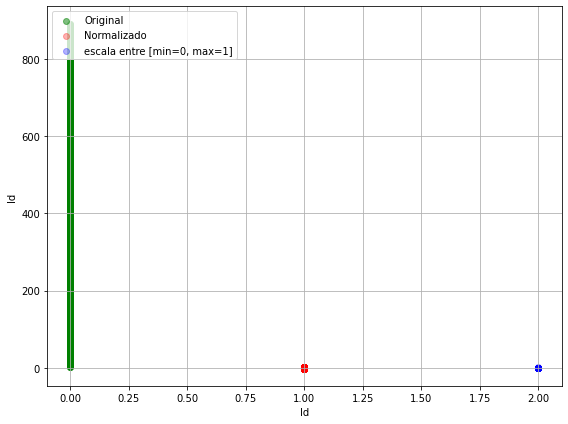

In [24]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter([0]*len(ID_original), ID_original,
            color='green', label='Original', alpha=0.5)

    plt.scatter([1]*len(ID_standard), ID_standard, color='red',
            label='Normalizado', alpha=0.3)

    plt.scatter([2]*len(ID_minmax), ID_minmax,
            color='blue', label='escala entre [min=0, max=1]', alpha=0.3)

    plt.xlabel('Id')
    plt.ylabel('Id')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

In [25]:
## dados originais
Fare_original = train_data['Fare'].values.reshape(-1, 1)
## Normaliza os dados
Fare_standard = preprocessing.StandardScaler().fit_transform(train_data['Fare'].values.reshape(-1, 1)) 
## Muda a escala dos dados para valores entre 0 e 1 (valores padrão, que poderiam ser personalizados)
Fare_minmax = preprocessing.MinMaxScaler().fit_transform(train_data['Fare'].values.reshape(-1, 1))

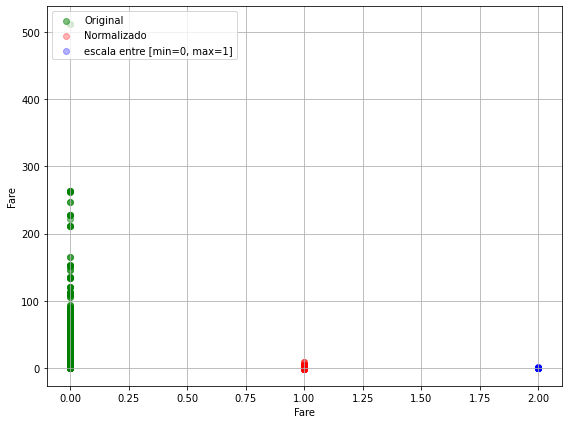

In [26]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter([0]*len(Fare_original), Fare_original,
            color='green', label='Original', alpha=0.5)

    plt.scatter([1]*len(Fare_original), Fare_standard, color='red',
            label='Normalizado', alpha=0.3)

    plt.scatter([2]*len(Fare_original), Fare_minmax,
            color='blue', label='escala entre [min=0, max=1]', alpha=0.3)

    plt.xlabel('Fare')
    plt.ylabel('Fare')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

### Pequeno tratamento

In [27]:
data1 = train_data.copy(deep = True)

data_cleaner = [data1, test_data]

for dataset in data_cleaner:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
#delete the cabin feature/column and others previously stated to exclude in train dataset
drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)

print(data1.isnull().sum())
print("-"*10)
print(test_data.isnull().sum())


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
C           0
Q           0
S           0
1           0
2           0
3           0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


### Busca por Titulos 

In [28]:
for dataset in data_cleaner:
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]


    #Continuous variable bins; qcut vs cut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
    #Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)


    
#cleanup rare title names
#print(data1['Title'].value_counts())
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (data1['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print("-"*10)


#preview data again
data1.info()
test_data.info()
data1.sample(10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   C           891 non-null    int64   
 10  Q           891 non-null    int64   
 11  S           891 non-null    int64   
 12  1           891 non-null    int64   
 13  2           891 non-null    int64   
 14  3           891 non-null    int64   
 15  FamilySize  891 non-null    int64   
 16  IsAlone     891 non-null   

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,1,2,3,FamilySize,IsAlone,Title,FareBin,AgeBin
796,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,25.9292,S,0,0,1,1,0,0,1,1,Misc,"(14.454, 31.0]","(48.0, 64.0]"
344,0,2,"Fox, Mr. Stanley Hubert",male,36.0,0,0,13.0000,S,0,0,1,0,1,0,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"
751,1,3,"Moor, Master. Meier",male,6.0,0,1,12.4750,S,0,0,1,0,0,1,2,0,Master,"(7.91, 14.454]","(-0.08, 16.0]"
233,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,31.3875,S,0,0,1,0,0,1,7,0,Miss,"(31.0, 512.329]","(-0.08, 16.0]"
550,1,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,110.8833,C,1,0,0,1,0,0,3,0,Mr,"(31.0, 512.329]","(16.0, 32.0]"
157,0,3,"Corn, Mr. Harry",male,30.0,0,0,8.0500,S,0,0,1,0,0,1,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
765,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,77.9583,S,0,0,1,1,0,0,2,0,Mrs,"(31.0, 512.329]","(48.0, 64.0]"
88,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,263.0000,S,0,0,1,1,0,0,6,0,Miss,"(31.0, 512.329]","(16.0, 32.0]"
437,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,18.7500,S,0,0,1,0,1,0,6,0,Mrs,"(14.454, 31.0]","(16.0, 32.0]"
686,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,39.6875,S,0,0,1,0,0,1,6,0,Mr,"(31.0, 512.329]","(-0.08, 16.0]"


### Tratamento dos dados para facilitar analise

In [29]:
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')


#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')



data1_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [30]:
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

print('Test/Validation columns with null values: \n', test_data.isnull().sum())
print("-"*10)
print (test_data.info())
print("-"*10)

train_data.describe(include = 'all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
C                0
Q                0
S                0
1                0
2                0
3                0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,1,2,3
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891,891,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,148,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,NotFClass,S,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,687,646,NaN,NaN,NaN,NaN,NaN,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,0.188552,0.086420,0.725028,0.242424,0.206510,0.551066
std,257.353842,0.486592,0.836071,NaN,NaN,13.002015,1.102743,0.806057,NaN,49.693429,NaN,NaN,0.391372,0.281141,0.446751,0.428790,0.405028,0.497665
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,29.699118,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000


### Divisão dos conjuntos de dados

In [31]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)


print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 25)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


# Padrões Interessantes

### Alguns resultados

Correlaçao entre sobreviver e demais atributos

In [32]:
for x in data1_x:
    if data1[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        

#using crosstabs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html
print(pd.crosstab(data1['Title'],data1[Target[0]]))

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1 

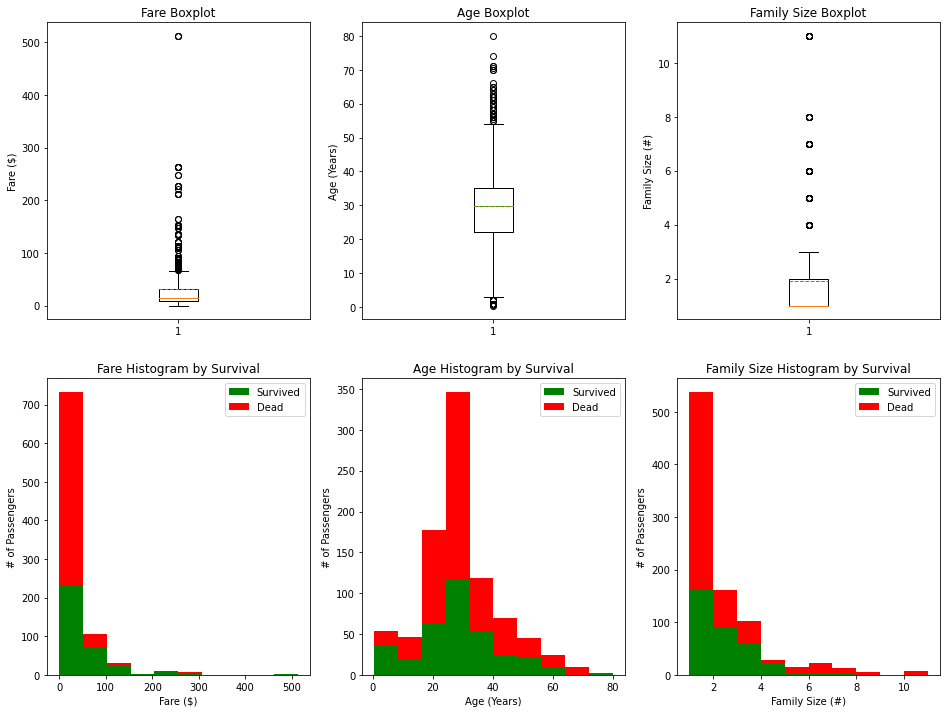

In [33]:
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data1['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(data1['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

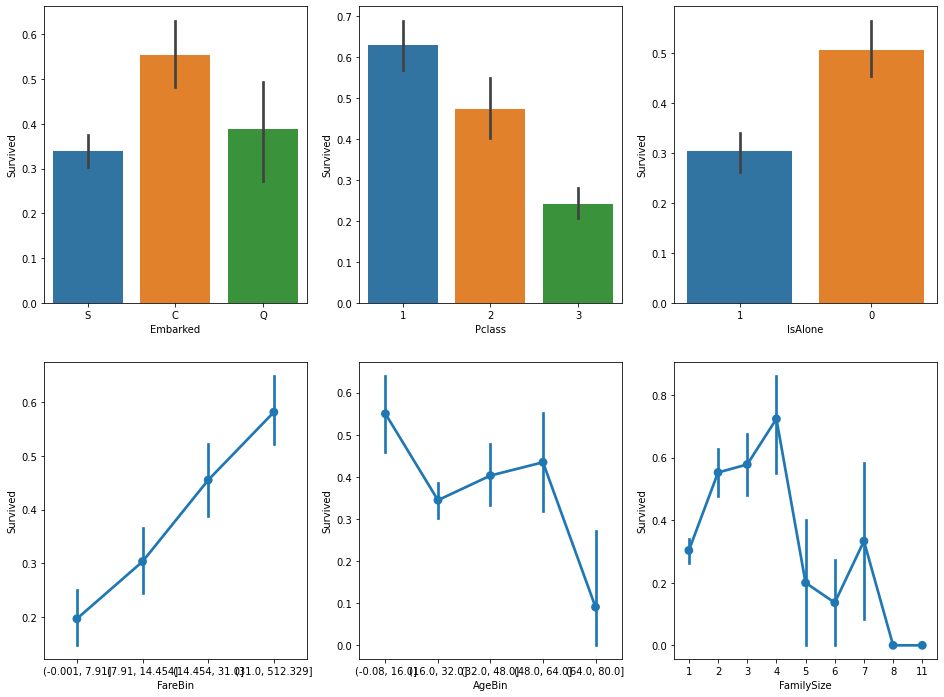

In [34]:
#we will use seaborn graphics for multi-variable comparison: https://seaborn.pydata.org/api.html

#graph individual features by survival
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data=data1, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=data1, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=data1, ax = saxis[0,2])

sns.pointplot(x = 'FareBin', y = 'Survived',  data=data1, ax = saxis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived',  data=data1, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=data1, ax = saxis[1,2])

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

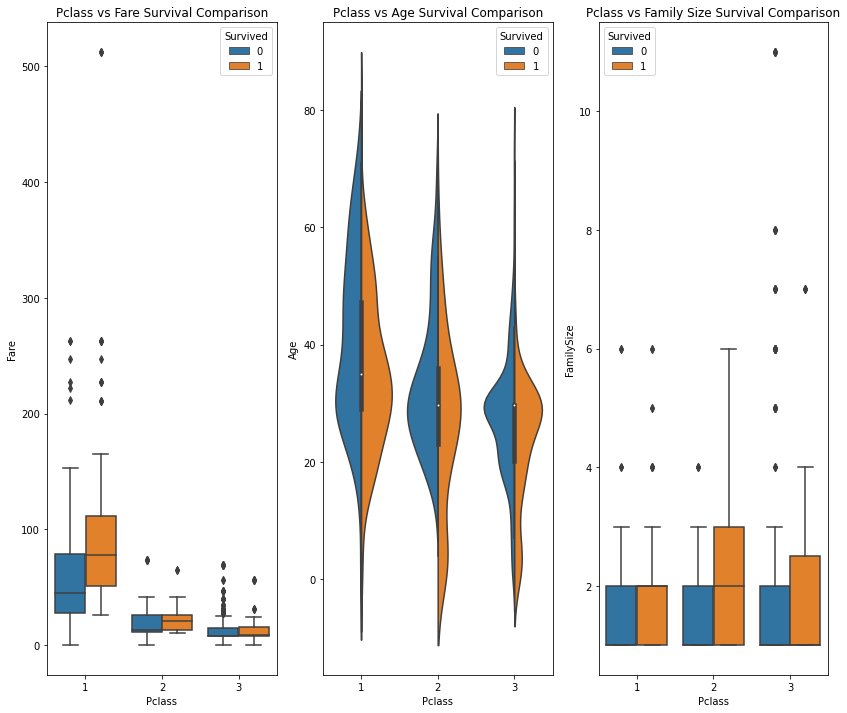

In [35]:
#graph distribution of qualitative data: Pclass
#we know class mattered in survival, now let's compare class and a 2nd feature
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = data1, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

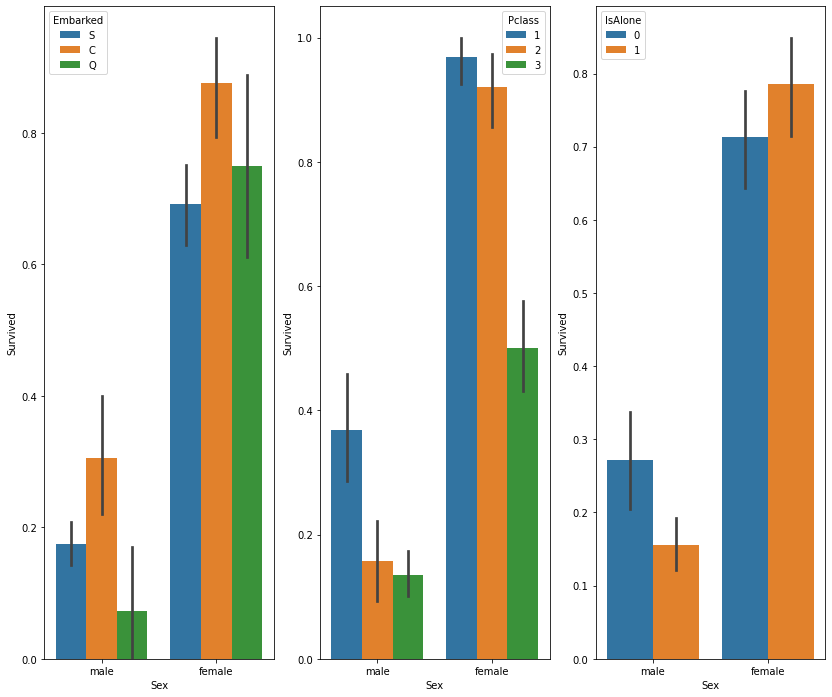

In [36]:
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data1, ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data1, ax  = qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=data1, ax  = qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

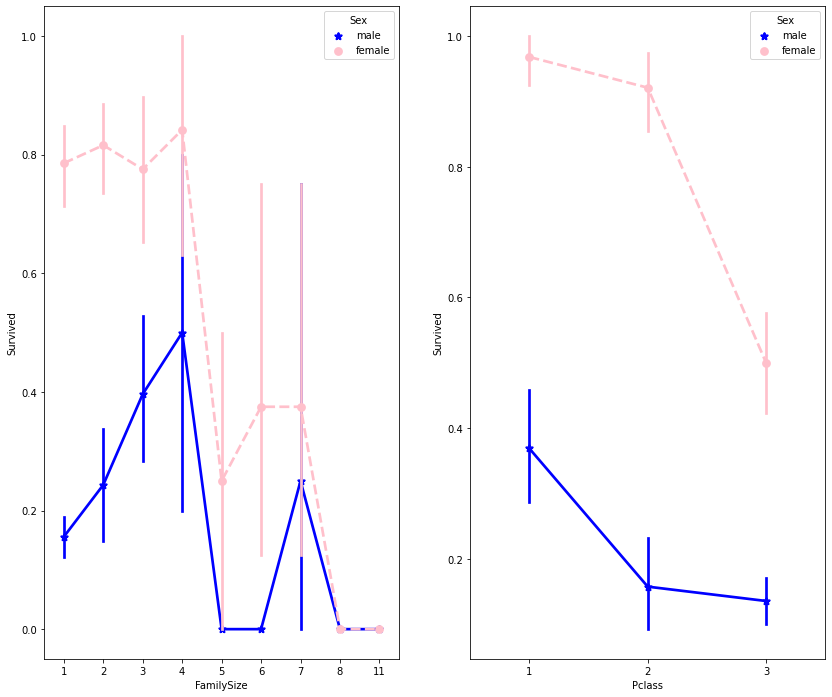

In [37]:
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does family size factor with sex & survival compare
sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

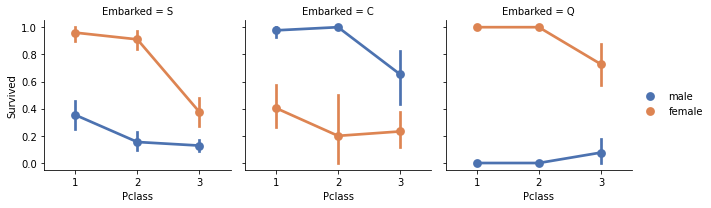

In [38]:
#how does embark port factor with class, sex, and survival compare
#facetgrid: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
e = sns.FacetGrid(data1, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()

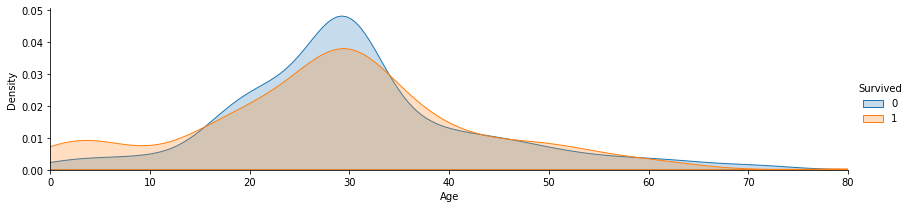

In [39]:
a = sns.FacetGrid( data1, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data1['Age'].max()))
a.add_legend()

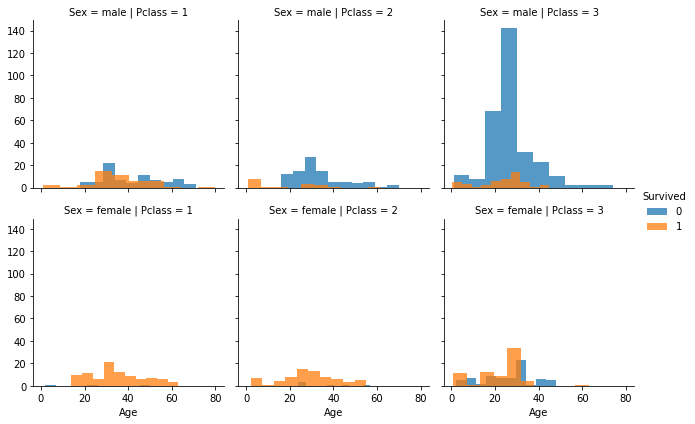

In [40]:
#histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(data1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

### Mapa de calor da Correlação

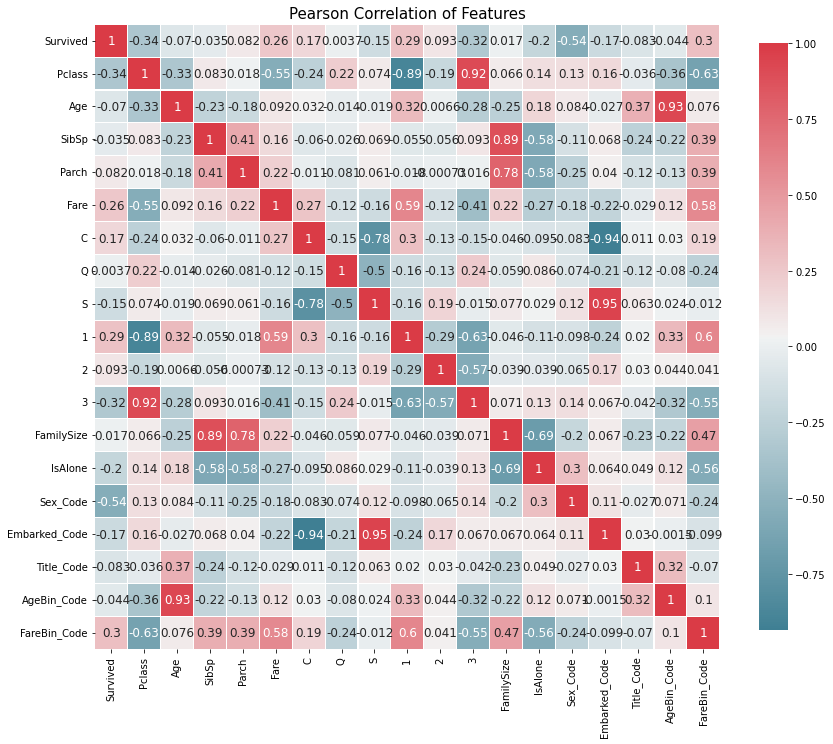

In [41]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

In [42]:
oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NotFClass,S,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NotFClass,S,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NotFClass,S,0,0,1,0,0,1


### Apriori

In [43]:
nominal_cols = ['Embarked','Pclass','Age', 'Survived', 'Sex']
cat_cols = ['Embarked','Pclass','Age', 'Survived', 'Title']
train_data['Title'] = train_data.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False)
train_data['Title'].fillna('Title_UK', inplace=True)
train_data['Embarked'].fillna('Unknown',inplace=True)
train_data['Age'].fillna(0, inplace=True)
# Replacing Binary with String
rep = {0: "Dead", 1: "Survived"}
train_data.replace({'Survived' : rep}, inplace=True)

In [44]:
def binning(col, cut_points, labels=None):
  minval = col.min()
  maxval = col.max()
  break_points = [minval] + cut_points + [maxval]
  if not labels:
    labels = range(len(cut_points)+1)
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

cut_points = [1, 20, 50 ]
labels = ["Unknown", "Young", "Adult", "Old"]
train_data['Age'] = binning(train_data['Age'], cut_points, labels)
in_titanic = train_data[nominal_cols]
cat_titanic = train_data[cat_cols]

In [45]:
in_titanic.head()

,Embarked,Pclass,Age,Survived,Sex
0,S,3,Adult,Dead,male
1,C,1,Adult,Survived,female
2,S,3,Adult,Survived,female
3,S,1,Adult,Survived,female
4,S,3,Adult,Dead,male


In [46]:
cat_titanic.head()

,Embarked,Pclass,Age,Survived,Title
0,S,3,Adult,Dead,Mr.
1,C,1,Adult,Survived,Mrs.
2,S,3,Adult,Survived,Miss.
3,S,1,Adult,Survived,Mrs.
4,S,3,Adult,Dead,Mr.


In [47]:
dataset = []
for i in range(0, in_titanic.shape[0]-1):
    dataset.append([str(in_titanic.values[i,j]) for j in range(0, in_titanic.shape[1])])
# dataset = in_titanic.to_xarray()

oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()

,1,2,3,Adult,C,Dead,Old,Q,S,Survived,Unknown,Young,female,male
0,False,False,True,True,False,True,False,False,True,False,False,False,False,True
1,True,False,False,True,True,False,False,False,False,True,False,False,True,False
2,False,False,True,True,False,False,False,False,True,True,False,False,True,False
3,True,False,False,True,False,False,False,False,True,True,False,False,True,False
4,False,False,True,True,False,True,False,False,True,False,False,False,False,True


In [48]:
oht.columns_

['1',
 '2',
 '3',
 'Adult',
 'C',
 'Dead',
 'Old',
 'Q',
 'S',
 'Survived',
 'Unknown',
 'Young',
 'female',
 'male']

In [49]:
output = apriori(df, min_support=0.2, use_colnames=oht.columns_)
output.head()

,support,itemsets
0,0.242697,(1)
1,0.206742,(2)
2,0.550562,(3)
3,0.726966,(Adult)
4,0.615730,(Dead)


['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
-------------------------------------
Configuration :  antecedent support  :  0.7
-------------------------------------
   antecedents          consequents  antecedent support  consequent support  \
0      (Adult)                  (3)            0.726966            0.550562   
1          (S)                  (3)            0.725843            0.550562   
2      (Adult)               (Dead)            0.726966            0.615730   
3      (Adult)                  (S)            0.726966            0.725843   
4          (S)              (Adult)            0.725843            0.726966   
5      (Adult)           (Survived)            0.726966            0.384270   
6      (Adult)             (female)            0.726966            0.352809   
7      (Adult)               (male)            0.726966            0.647191   
8          (S)               (Dead)       

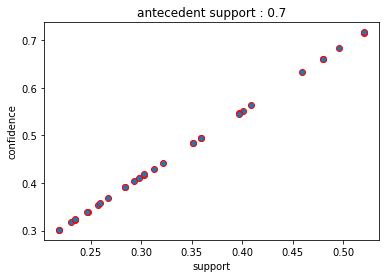

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
-------------------------------------
Configuration :  support  :  0.5
-------------------------------------
  antecedents consequents  antecedent support  consequent support   support  \
0     (Adult)         (S)            0.726966            0.725843  0.520225   
1         (S)     (Adult)            0.725843            0.726966  0.520225   
2      (Dead)      (male)            0.615730            0.647191  0.524719   
3      (male)      (Dead)            0.647191            0.615730  0.524719   

   confidence      lift  leverage  conviction  
0    0.715611  0.985903 -0.007438    0.964021  
1    0.716718  0.985903 -0.007438    0.963824  
2    0.852190  1.316752  0.126224    2.386905  
3    0.810764  1.316752  0.126224    2.030636  


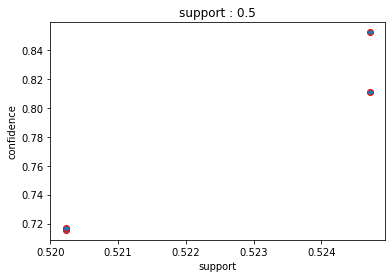

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
-------------------------------------
Configuration :  confidence  :  0.8
-------------------------------------
         antecedents consequents  antecedent support  consequent support  \
0             (Dead)      (male)            0.615730            0.647191   
1             (male)      (Dead)            0.647191            0.615730   
2             (3, S)      (Dead)            0.396629            0.615730   
3          (Dead, 3)      (male)            0.416854            0.647191   
4          (3, male)      (Dead)            0.388764            0.615730   
5      (Dead, Adult)      (male)            0.459551            0.647191   
6      (Adult, male)      (Dead)            0.479775            0.615730   
7          (Dead, S)      (male)            0.479775            0.647191   
8          (S, male)      (Dead)            0.495506            0.615730   
9

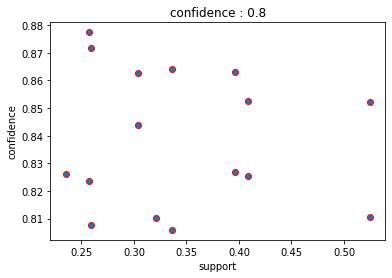

['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
-------------------------------------
Configuration :  conviction  :  3
-------------------------------------
        antecedents consequents  antecedent support  consequent support  \
0  (3, Adult, male)      (Dead)            0.293258             0.61573   

    support  confidence      lift  leverage  conviction  
0  0.257303    0.877395  1.424966  0.076735    3.134199  


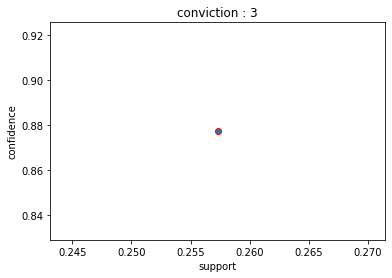

In [50]:
config = [
    ('antecedent support', 0.7),
    ('support', 0.5),
    ('confidence', 0.8),
    ('conviction', 3)
]

for metric_type, th in config:
    rules = association_rules(output, metric=metric_type, min_threshold=th)
    if rules.empty:
        print ('Empty Data Frame For Metric Type : ',metric_type,' on Threshold : ',th)
        continue
    print (rules.columns.values)
    print ('-------------------------------------')
    print ('Configuration : ', metric_type, ' : ', th)
    print ('-------------------------------------')
    print (rules)

    #support=rules.to_numpy(columns=['support'])
    #confidence=rules.to_numpy(columns=['confidence'])

    support=rules['support'].to_numpy()
    confidence=rules['confidence'].to_numpy()

    plt.scatter(support, confidence, edgecolors='red')
    plt.xlabel('support')
    plt.ylabel('confidence')
    plt.title(metric_type+' : '+str(th))
    plt.show()